In [1]:
from sklearn.datasets import make_classification
from train_model import train_network
import torch
import numpy as np
from matplotlib import pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [2]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
from torch.utils.data import Dataset, DataLoader

In [3]:
n_mosaic = 3000
K = 10
d = 4
n_classes = 5

In [4]:
x,y = make_classification(n_samples=500,n_features=d,n_informative=d,n_redundant=0,n_repeated= 0,n_classes=n_classes,n_clusters_per_class=1,flip_y=0.20,random_state=1234)   #D_4 random_state 1234 flipy 0.20    D_5 1236 flipy 0.15


In [5]:
data = {'X':x,'Y':y}
np.save("data_2.npy",data)

In [6]:
# fg vs bg
y1 = np.zeros(y.shape,dtype=np.long)
indices = np.logical_or(y == 0,y==1)   #  0 and 1 indices are fg 
y1[indices] = 0   #fg indices at index 0
y1[np.logical_not(indices)] = 1  #bg index at index1

# fg1 vs fg2
index = np.logical_or(y==0,y==1)
x2 = x[index,:]
y2 = np.zeros(index.shape,dtype=np.long)
y2 = y[index]

In [7]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list, mosaic_label):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label
    

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx]

batch = 250
# dataset = MosaicDataset(x2,y2)
# traindataloader = DataLoader( dataset,batch_size= batch ,shuffle=True)

# linear Models (fgvsbg and fg1vsfg2)

In [ ]:
class Net_linear(nn.Module):
  def __init__(self):
    super(Net_linear,self).__init__()
    self.linear1 = nn.Linear(d,2)
    # self.linear2 = nn.Linear(50,50)
    # self.linear3 = nn.Linear(50,50)
    # self.linear4 = nn.Linear(50,2)
  def forward(self,x):
    x = self.linear1(x)
    # x = F.relu(self.linear2(x))
    # x = F.relu(self.linear3(x))
    # x = F.relu(self.linear4(x))
    return x

In [ ]:
dataset = MosaicDataset(x,y1)
traindataloader = DataLoader( dataset,batch_size= batch ,shuffle=True)
net = Net_linear().double()
net =net.to(device)
train_model =train_network(net,traindataloader)
train_model.training(epochs=200,mini=1)



Training started...
[1,     1] loss: 0.872
[1,     2] loss: 0.835
[2,     1] loss: 0.850
[2,     2] loss: 0.816
[3,     1] loss: 0.839
[3,     2] loss: 0.757
[4,     1] loss: 0.754
[4,     2] loss: 0.750
[5,     1] loss: 0.726
[5,     2] loss: 0.688
[6,     1] loss: 0.671
[6,     2] loss: 0.651
[7,     1] loss: 0.633
[7,     2] loss: 0.614
[8,     1] loss: 0.585
[8,     2] loss: 0.601
[9,     1] loss: 0.581
[9,     2] loss: 0.561
[10,     1] loss: 0.567
[10,     2] loss: 0.543
[11,     1] loss: 0.553
[11,     2] loss: 0.535
[12,     1] loss: 0.508
[12,     2] loss: 0.567
[13,     1] loss: 0.534
[13,     2] loss: 0.531
[14,     1] loss: 0.524
[14,     2] loss: 0.535
[15,     1] loss: 0.523
[15,     2] loss: 0.531
[16,     1] loss: 0.492
[16,     2] loss: 0.558
[17,     1] loss: 0.521
[17,     2] loss: 0.526
[18,     1] loss: 0.503
[18,     2] loss: 0.541
[19,     1] loss: 0.528
[19,     2] loss: 0.512
[20,     1] loss: 0.534
[20,     2] loss: 0.504
[21,     1] loss: 0.512
[21,     2] lo

percentage accuracy:  0.738


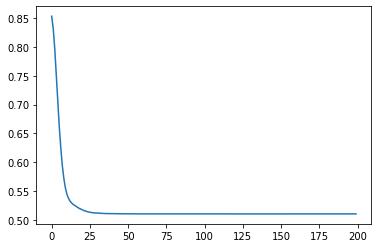

In [ ]:
_,_=train_model.predict(traindataloader,True)
plt.plot(train_model.train_loss)

***Saving Pretrained Focus Network fg vs bg***

In [ ]:
train_model.save_models("pretrained_focusl_net")

In [ ]:
dataset = MosaicDataset(x2,y2)
traindataloader = DataLoader( dataset,batch_size= batch ,shuffle=True)
net = Net_linear().double()
net =net.to(device)
train_model =train_network(net,traindataloader)
train_model.training(epochs=100,mini=1)



Training started...
[1,     1] loss: 1.237
[2,     1] loss: 1.218
[3,     1] loss: 1.183
[4,     1] loss: 1.135
[5,     1] loss: 1.076
[6,     1] loss: 1.009
[7,     1] loss: 0.938
[8,     1] loss: 0.865
[9,     1] loss: 0.795
[10,     1] loss: 0.729
[11,     1] loss: 0.669
[12,     1] loss: 0.617
[13,     1] loss: 0.572
[14,     1] loss: 0.535
[15,     1] loss: 0.504
[16,     1] loss: 0.479
[17,     1] loss: 0.458
[18,     1] loss: 0.440
[19,     1] loss: 0.426
[20,     1] loss: 0.413
[21,     1] loss: 0.403
[22,     1] loss: 0.394
[23,     1] loss: 0.386
[24,     1] loss: 0.379
[25,     1] loss: 0.372
[26,     1] loss: 0.367
[27,     1] loss: 0.362
[28,     1] loss: 0.357
[29,     1] loss: 0.353
[30,     1] loss: 0.349
[31,     1] loss: 0.345
[32,     1] loss: 0.342
[33,     1] loss: 0.339
[34,     1] loss: 0.336
[35,     1] loss: 0.333
[36,     1] loss: 0.331
[37,     1] loss: 0.328
[38,     1] loss: 0.326
[39,     1] loss: 0.324
[40,     1] loss: 0.322
[41,     1] loss: 0.320
[42, 

percentage accuracy:  0.8866995073891626


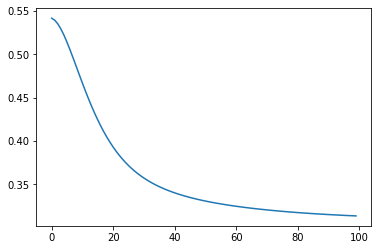

In [ ]:
_,_=train_model.predict(traindataloader,True)
plt.plot(train_model.train_loss)

***Saving Classification Network fg1 vs fg2***

In [ ]:
train_model.save_models("pretrained_classifyl_net")

# train deep models (fgvsbg and fg1vsfg2)

In [ ]:
class Net_deep(nn.Module):
  def __init__(self):
    super(Net_deep,self).__init__()
    self.linear1 = nn.Linear(d,50)
    self.linear2 = nn.Linear(50,2)
  def forward(self,x):
    x = F.relu(self.linear1(x))
    x = self.linear2(x)
    
    return x

In [ ]:
dataset = MosaicDataset(x,y1)
traindataloader = DataLoader( dataset,batch_size= batch ,shuffle=True)
net = Net_deep().double()
net =net.to(device)
train_model =train_network(net,traindataloader)
train_model.training(epochs=200,mini=1)

Training started...
[1,     1] loss: 0.832
[1,     2] loss: 0.813
[2,     1] loss: 0.760
[2,     2] loss: 0.780
[3,     1] loss: 0.700
[3,     2] loss: 0.694
[4,     1] loss: 0.657
[4,     2] loss: 0.619
[5,     1] loss: 0.628
[5,     2] loss: 0.567
[6,     1] loss: 0.563
[6,     2] loss: 0.589
[7,     1] loss: 0.602
[7,     2] loss: 0.513
[8,     1] loss: 0.508
[8,     2] loss: 0.571
[9,     1] loss: 0.501
[9,     2] loss: 0.541
[10,     1] loss: 0.530
[10,     2] loss: 0.472
[11,     1] loss: 0.506
[11,     2] loss: 0.459
[12,     1] loss: 0.425
[12,     2] loss: 0.513
[13,     1] loss: 0.451
[13,     2] loss: 0.470
[14,     1] loss: 0.433
[14,     2] loss: 0.478
[15,     1] loss: 0.427
[15,     2] loss: 0.480
[16,     1] loss: 0.488
[16,     2] loss: 0.416
[17,     1] loss: 0.454
[17,     2] loss: 0.445
[18,     1] loss: 0.428
[18,     2] loss: 0.467
[19,     1] loss: 0.438
[19,     2] loss: 0.452
[20,     1] loss: 0.440
[20,     2] loss: 0.445
[21,     1] loss: 0.430
[21,     2] lo

percentage accuracy:  0.832


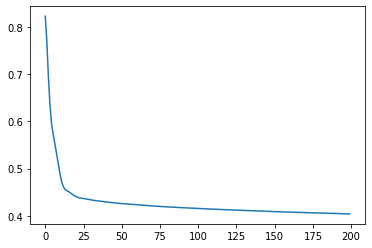

In [ ]:
_,_=train_model.predict(traindataloader,True)
plt.plot(train_model.train_loss)

***Saving Pretrained Focus Network fg vs bg***

In [ ]:
train_model.save_models("pretrained_focusd_net")

In [ ]:
dataset = MosaicDataset(x2,y2)
traindataloader = DataLoader( dataset,batch_size= batch ,shuffle=True)
net = Net_deep().double()
net =net.to(device)
train_model =train_network(net,traindataloader)
train_model.training(epochs=100,mini=1)


Training started...
[1,     1] loss: 0.655
[2,     1] loss: 0.643
[3,     1] loss: 0.623
[4,     1] loss: 0.598
[5,     1] loss: 0.572
[6,     1] loss: 0.546
[7,     1] loss: 0.522
[8,     1] loss: 0.501
[9,     1] loss: 0.483
[10,     1] loss: 0.467
[11,     1] loss: 0.453
[12,     1] loss: 0.440
[13,     1] loss: 0.428
[14,     1] loss: 0.417
[15,     1] loss: 0.408
[16,     1] loss: 0.399
[17,     1] loss: 0.391
[18,     1] loss: 0.384
[19,     1] loss: 0.377
[20,     1] loss: 0.372
[21,     1] loss: 0.367
[22,     1] loss: 0.363
[23,     1] loss: 0.360
[24,     1] loss: 0.357
[25,     1] loss: 0.354
[26,     1] loss: 0.351
[27,     1] loss: 0.348
[28,     1] loss: 0.346
[29,     1] loss: 0.343
[30,     1] loss: 0.341
[31,     1] loss: 0.338
[32,     1] loss: 0.336
[33,     1] loss: 0.334
[34,     1] loss: 0.331
[35,     1] loss: 0.329
[36,     1] loss: 0.327
[37,     1] loss: 0.325
[38,     1] loss: 0.323
[39,     1] loss: 0.321
[40,     1] loss: 0.319
[41,     1] loss: 0.317
[42, 

percentage accuracy:  0.9040404040404041


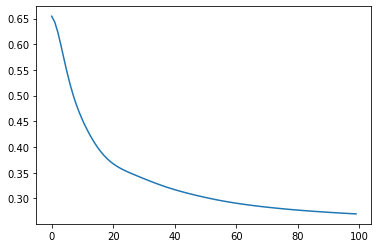

In [ ]:
_,_=train_model.predict(traindataloader,True)
plt.plot(train_model.train_loss)

***Saving Classification Network fg1 vs fg2***

In [ ]:
train_model.save_models("pretrained_classifyd_net")

# Mosaic Data

In [8]:
from plots import plot_analysis,focus_map,classification_map
from Models_Elemental import Focus_linear,Classification_linear
from Models_Elemental import Focus_deep,Classification_deep
from train_mosaic_new import train_mosaic_network

cpu


In [9]:
idx= []
for i in range(n_classes):
    print(i,sum(y==i))
    idx.append(y==i)

0 94
1 104
2 91
3 102
4 109


In [10]:
foreground_classes = {'class_0' ,'class_1'}

background_classes = {'class_2','class_3'}#,'class_4', 'class_5', 'class_6','class_7', 'class_8', 'class_9'}

In [11]:

mosaic_list =[]
mosaic_label = []
fore_idx=[]
for j in range(n_mosaic):
    fg_class  = np.random.randint(0,len(foreground_classes))
    fg_idx = np.random.randint(0,K)
    a = []
    for i in range(K):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(len(foreground_classes),n_classes)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list.append(np.reshape(a,(d*K,1)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

In [12]:
mosaic_list = np.concatenate(mosaic_list,axis=1).T
mosaic_list.shape

(3000, 40)

In [13]:
np.unique(mosaic_label)

array([0, 1])

In [14]:
mosaic_data = {"X":mosaic_list,"Y":mosaic_label,"foreground_indices":fore_idx}
np.save("mosaic_data_4.npy",mosaic_data)

# Linear Support Vector Classifier on Mosaic Data

In [ ]:
from sklearn.svm import SVC
sv = SVC(C=100,kernel="linear")
sv.fit(mosaic_list,mosaic_label)
print(sv.score(mosaic_list,mosaic_label))

0.6306666666666667


# Deep Network For Mosaic Data

In [15]:
class Net1(nn.Module):
  def __init__(self):
    super(Net1,self).__init__()
    self.linear1 = nn.Linear(d*K,50)
    self.linear2 = nn.Linear(50,50)
    self.linear3 = nn.Linear(50,50)
    self.linear4 = nn.Linear(50,2)
  def forward(self,x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = F.relu(self.linear3(x))
    x = self.linear4(x)
    return x

In [16]:
class MosaicData(Dataset):
  """MosaicDataset dataset (without foreidx)."""

  def __init__(self, mosaic_list, mosaic_label):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx]

batch = 250

In [17]:
dataset = MosaicData(mosaic_list,mosaic_label)
mosaicdataloader = DataLoader( dataset,batch_size= batch ,shuffle=True)
net1 = Net1().double()
net1 =net1.to(device)
train_mosaic =train_network(net1,mosaicdataloader)
train_mosaic.training(epochs=200,mini=1)

Training started...
[1,     1] loss: 0.696
[1,     2] loss: 0.694
[1,     3] loss: 0.694
[1,     4] loss: 0.694
[1,     5] loss: 0.694
[1,     6] loss: 0.694
[1,     7] loss: 0.693
[1,     8] loss: 0.690
[1,     9] loss: 0.695
[1,    10] loss: 0.690
[1,    11] loss: 0.691
[1,    12] loss: 0.689
[2,     1] loss: 0.688
[2,     2] loss: 0.691
[2,     3] loss: 0.692
[2,     4] loss: 0.692
[2,     5] loss: 0.691
[2,     6] loss: 0.686
[2,     7] loss: 0.689
[2,     8] loss: 0.690
[2,     9] loss: 0.684
[2,    10] loss: 0.690
[2,    11] loss: 0.685
[2,    12] loss: 0.686
[3,     1] loss: 0.686
[3,     2] loss: 0.684
[3,     3] loss: 0.691
[3,     4] loss: 0.686
[3,     5] loss: 0.687
[3,     6] loss: 0.684
[3,     7] loss: 0.681
[3,     8] loss: 0.680
[3,     9] loss: 0.681
[3,    10] loss: 0.679
[3,    11] loss: 0.683
[3,    12] loss: 0.681
[4,     1] loss: 0.680
[4,     2] loss: 0.678
[4,     3] loss: 0.682
[4,     4] loss: 0.678
[4,     5] loss: 0.678
[4,     6] loss: 0.681
[4,     7] los

percentage accuracy:  0.962


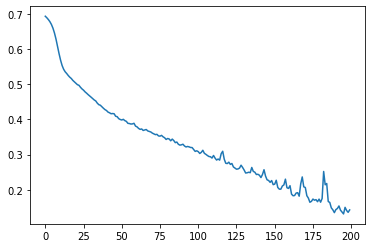

In [18]:
_,_=train_mosaic.predict(mosaicdataloader,True)
plt.plot(train_mosaic.train_loss)

# Attention Networks

In [15]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

batch = 250
msd = MosaicDataset(mosaic_list, mosaic_label , fore_idx)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=True)

# linear Attention network

In [ ]:
pretrained_classify = True
pretrained_focus = True
if pretrained_classify == True:
  where = Focus_linear(d,1,K,d).double()
  what = Classification_linear(d,2).double()
  what.load_state_dict( torch.load("pretrained_classifyl_net.pt"))

if pretrained_focus == True:
  where = Focus_linear(d,2,K,d,pretrained=True).double()
  what = Classification_linear(d,2).double()
  where.load_state_dict( torch.load("pretrained_focusl_net.pt"))
if pretrained_focus == False and pretrained_classify == False:
    where = Focus_linear(d,1,K,d).double()
    what = Classification_linear(d,2).double()
elif pretrained_focus ==True and pretrained_classify ==True:
  where = Focus_linear(d,2,K,d,pretrained=True).double()
  what = Classification_linear(d,2).double()
  what.load_state_dict( torch.load("pretrained_classifyl_net.pt"))
  where.load_state_dict( torch.load("pretrained_focusl_net.pt"))



In [ ]:
train_mosaic = train_mosaic_network(where,what,train_loader,elemental=False,lr=0.01)

In [ ]:
train_mosaic.training(epochs=200,mini=3,train_focus=True,train_classify=False)

Training started...
[1,     3] loss: 0.555
[1,     6] loss: 0.567
[1,     9] loss: 0.535
[1,    12] loss: 0.526
[2,     3] loss: 0.539
[2,     6] loss: 0.540
[2,     9] loss: 0.540
[2,    12] loss: 0.538
[3,     3] loss: 0.541
[3,     6] loss: 0.520
[3,     9] loss: 0.548
[3,    12] loss: 0.544
[4,     3] loss: 0.536
[4,     6] loss: 0.546
[4,     9] loss: 0.528
[4,    12] loss: 0.538
[5,     3] loss: 0.560
[5,     6] loss: 0.511
[5,     9] loss: 0.518
[5,    12] loss: 0.557
[6,     3] loss: 0.536
[6,     6] loss: 0.545
[6,     9] loss: 0.513
[6,    12] loss: 0.552
[7,     3] loss: 0.528
[7,     6] loss: 0.525
[7,     9] loss: 0.552
[7,    12] loss: 0.540
[8,     3] loss: 0.534
[8,     6] loss: 0.538
[8,     9] loss: 0.542
[8,    12] loss: 0.531
[9,     3] loss: 0.529
[9,     6] loss: 0.559
[9,     9] loss: 0.523
[9,    12] loss: 0.534
[10,     3] loss: 0.525
[10,     6] loss: 0.553
[10,     9] loss: 0.534
[10,    12] loss: 0.534
[11,     3] loss: 0.518
[11,     6] loss: 0.570
[11,    

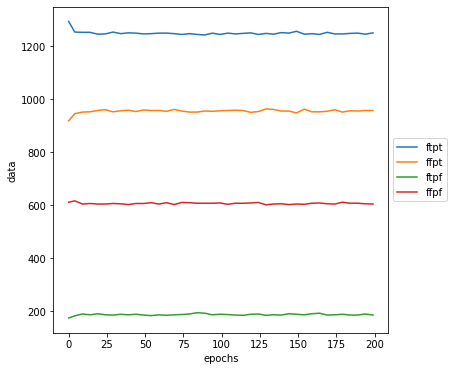

In [ ]:
plot_analysis(np.array(train_mosaic.train_analysis))

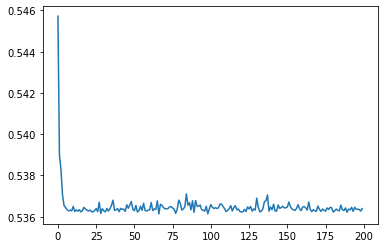

In [ ]:
plt.plot(train_mosaic.train_loss)

In [ ]:
_,_,_,_ = train_mosaic.predict(train_loader,True)

percentage accuracy:  0.7363333333333333


#  deep Attention Networks

In [ ]:
pretrained_classify = True
pretrained_focus = False
if pretrained_classify == True:
  where_deep = Focus_deep(d,1,K,d).double()
  what_deep = Classification_deep(d,2).double()
  what_deep.load_state_dict( torch.load("pretrained_classifyd_net.pt"))

if pretrained_focus == True:
  where_deep = Focus_deep(d,2,K,d,pretrained=True).double()
  what_deep = Classification_deep(d,2).double()
  where_deep.load_state_dict( torch.load("pretrained_focusd_net.pt"))
if pretrained_focus == False and pretrained_classify == False:
  where_deep = Focus_deep(d,1,K,d).double()
  what_deep = Classification_deep(d,2).double()
elif pretrained_focus ==True and pretrained_classify ==True:
  where_deep = Focus_deep(d,2,K,d,pretrained=True).double()
  what_deep = Classification_deep(d,2).double()
  what_deep.load_state_dict( torch.load("pretrained_classifyd_net.pt"))
  where_deep.load_state_dict( torch.load("pretrained_focusd_net.pt"))



In [ ]:
train_mosaic_deep = train_mosaic_network(where_deep,what_deep,train_loader,elemental=False,lr =0.01)
train_mosaic_deep.training(epochs=700,mini=3,train_focus=False,train_classify=True)

Training started...
[1,     3] loss: 0.680
[1,     6] loss: 0.668
[1,     9] loss: 0.678
[1,    12] loss: 0.658
[2,     3] loss: 0.660
[2,     6] loss: 0.645
[2,     9] loss: 0.655
[2,    12] loss: 0.650
[3,     3] loss: 0.649
[3,     6] loss: 0.659
[3,     9] loss: 0.640
[3,    12] loss: 0.630
[4,     3] loss: 0.636
[4,     6] loss: 0.637
[4,     9] loss: 0.624
[4,    12] loss: 0.664
[5,     3] loss: 0.642
[5,     6] loss: 0.642
[5,     9] loss: 0.618
[5,    12] loss: 0.647
[6,     3] loss: 0.650
[6,     6] loss: 0.635
[6,     9] loss: 0.624
[6,    12] loss: 0.633
[7,     3] loss: 0.638
[7,     6] loss: 0.641
[7,     9] loss: 0.632
[7,    12] loss: 0.626
[8,     3] loss: 0.634
[8,     6] loss: 0.634
[8,     9] loss: 0.623
[8,    12] loss: 0.642
[9,     3] loss: 0.633
[9,     6] loss: 0.624
[9,     9] loss: 0.621
[9,    12] loss: 0.652
[10,     3] loss: 0.633
[10,     6] loss: 0.643
[10,     9] loss: 0.619
[10,    12] loss: 0.632
[11,     3] loss: 0.625
[11,     6] loss: 0.626
[11,    

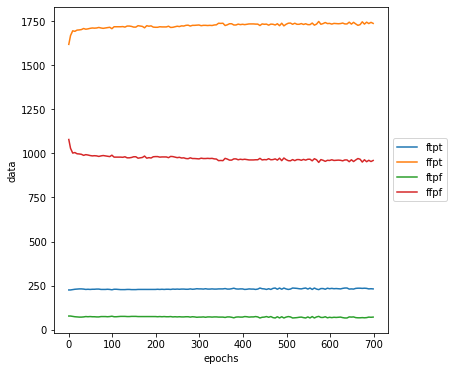

In [ ]:
plot_analysis(np.array(train_mosaic_deep.train_analysis))

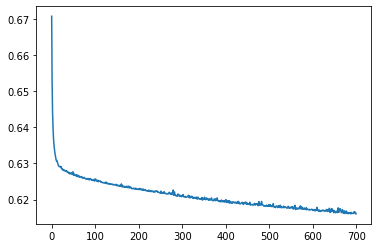

In [ ]:
plt.plot(train_mosaic_deep.train_loss)

In [ ]:
_,_,_,_ = train_mosaic_deep.predict(train_loader,True)

percentage accuracy:  0.6563333333333333


## linear deep attention network

In [50]:
pretrained_classify = True
pretrained_focus = True
if pretrained_classify == True:
  where_deep = Focus_linear(d,1,K,d).double()
  what_deep = Classification_deep(d,2).double()
  what_deep.load_state_dict( torch.load("pretrained_classifyd_net.pt"))

if pretrained_focus == True:
  where_deep = Focus_linear(d,2,K,d,pretrained=True).double()
  what_deep = Classification_deep(d,2).double()
  where_deep.load_state_dict( torch.load("pretrained_focusl_net.pt"))
if pretrained_focus == False and pretrained_classify == False:
  where_deep = Focus_linear(d,1,K,d).double()
  what_deep = Classification_deep(d,2).double()
elif pretrained_focus ==True and pretrained_classify ==True:
  where_deep = Focus_linear(d,2,K,d,pretrained=True).double()
  what_deep = Classification_deep(d,2).double()
  what_deep.load_state_dict( torch.load("pretrained_classifyd_net.pt"))
  where_deep.load_state_dict( torch.load("pretrained_focusl_net.pt"))

Training started...
[1,     3] loss: 0.597
[1,     6] loss: 0.542
[1,     9] loss: 0.536
[1,    12] loss: 0.564
[2,     3] loss: 0.560
[2,     6] loss: 0.564
[2,     9] loss: 0.540
[2,    12] loss: 0.536
[3,     3] loss: 0.556
[3,     6] loss: 0.524
[3,     9] loss: 0.528
[3,    12] loss: 0.569
[4,     3] loss: 0.524
[4,     6] loss: 0.549
[4,     9] loss: 0.534
[4,    12] loss: 0.554
[5,     3] loss: 0.554
[5,     6] loss: 0.520
[5,     9] loss: 0.544
[5,    12] loss: 0.532
[6,     3] loss: 0.555
[6,     6] loss: 0.521
[6,     9] loss: 0.539
[6,    12] loss: 0.532
[7,     3] loss: 0.546
[7,     6] loss: 0.511
[7,     9] loss: 0.541
[7,    12] loss: 0.544
[8,     3] loss: 0.551
[8,     6] loss: 0.571
[8,     9] loss: 0.501
[8,    12] loss: 0.517
[9,     3] loss: 0.541
[9,     6] loss: 0.540
[9,     9] loss: 0.548
[9,    12] loss: 0.509
[10,     3] loss: 0.508
[10,     6] loss: 0.524
[10,     9] loss: 0.543
[10,    12] loss: 0.560
[11,     3] loss: 0.543
[11,     6] loss: 0.522
[11,    

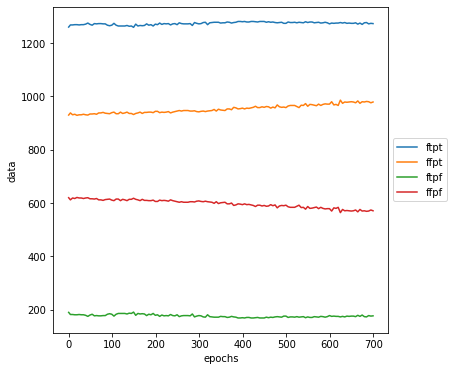

In [51]:
train_mosaic_deep = train_mosaic_network(where_deep,what_deep,train_loader,elemental=False,lr =0.01)
train_mosaic_deep.training(epochs=700,mini=3,train_focus=False,train_classify=True)
plot_analysis(np.array(train_mosaic_deep.train_analysis))
#plt.plot(train_mosaic_deep.train_loss)
_,_,_,_ = train_mosaic_deep.predict(train_loader,True)

# deep linear attention network

In [86]:
pretrained_classify = True
pretrained_focus = True
if pretrained_classify == True:
  where_deep = Focus_deep(d,1,K,d).double()
  what_deep = Classification_linear(d,2).double()
  what_deep.load_state_dict( torch.load("pretrained_classifyl_net.pt"))

if pretrained_focus == True:
  where_deep = Focus_deep(d,2,K,d,pretrained=True).double()
  what_deep = Classification_linear(d,2).double()
  where_deep.load_state_dict( torch.load("pretrained_focusd_net.pt"))
if pretrained_focus == False and pretrained_classify == False:
  where_deep = Focus_deep(d,1,K,d).double()
  what_deep = Classification_linear(d,2).double()
elif pretrained_focus ==True and pretrained_classify ==True:
  where_deep = Focus_deep(d,2,K,d,pretrained=True).double()
  what_deep = Classification_linear(d,2).double()
  what_deep.load_state_dict( torch.load("pretrained_classifyl_net.pt"))
  where_deep.load_state_dict( torch.load("pretrained_focusd_net.pt"))

Training started...
[1,     3] loss: 0.520
[1,     6] loss: 0.554
[1,     9] loss: 0.532
[1,    12] loss: 0.510
[2,     3] loss: 0.538
[2,     6] loss: 0.493
[2,     9] loss: 0.532
[2,    12] loss: 0.540
[3,     3] loss: 0.530
[3,     6] loss: 0.522
[3,     9] loss: 0.543
[3,    12] loss: 0.502
[4,     3] loss: 0.505
[4,     6] loss: 0.526
[4,     9] loss: 0.566
[4,    12] loss: 0.496
[5,     3] loss: 0.498
[5,     6] loss: 0.516
[5,     9] loss: 0.536
[5,    12] loss: 0.542
[6,     3] loss: 0.525
[6,     6] loss: 0.515
[6,     9] loss: 0.527
[6,    12] loss: 0.525
[7,     3] loss: 0.542
[7,     6] loss: 0.550
[7,     9] loss: 0.520
[7,    12] loss: 0.480
[8,     3] loss: 0.523
[8,     6] loss: 0.488
[8,     9] loss: 0.535
[8,    12] loss: 0.546
[9,     3] loss: 0.500
[9,     6] loss: 0.528
[9,     9] loss: 0.549
[9,    12] loss: 0.515
[10,     3] loss: 0.541
[10,     6] loss: 0.509
[10,     9] loss: 0.532
[10,    12] loss: 0.509
[11,     3] loss: 0.556
[11,     6] loss: 0.507
[11,    

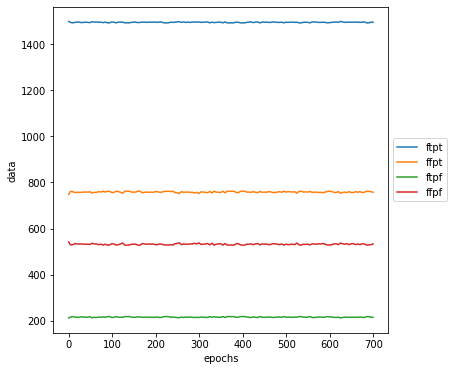

In [87]:
train_mosaic_deep = train_mosaic_network(where_deep,what_deep,train_loader,elemental=False,lr =0.01)
train_mosaic_deep.training(epochs=700,mini=3,train_focus=False,train_classify=True)
plot_analysis(np.array(train_mosaic_deep.train_analysis))
#plt.plot(train_mosaic_deep.train_loss)
_,_,_,_ = train_mosaic_deep.predict(train_loader,True)